### Load Packages

In [55]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from tqdm import tqdm

### Particule Swarm Optimization Algorithm (PSO - 1D)

- $\texttt{Update\_velocity}$ function
    - $\texttt{particles}$ np array of the positions of the particles
    - $\texttt{velocity}$ np array with the velocities of each particle
    - $\texttt{pbest}$ np array with the personal best of each particle
    - $\texttt{gbest}$ float which represents the global best across particles

In [56]:
# update the velocity of the particules
def update_velocity(particles, velocity, pbest, gbest):
    
    r1 = np.random.uniform(0, 1) # choose randomly r1 between 0 and 1
    r2 = np.random.uniform(0, 1)
    inertia = w * velocity # the inertia term 
    cognitive = c1 * r1 * (pbest - particles) # the term of individual exploration
    social = c2 * r2 * (gbest - particles) # the term of global search
    new_velocity = inertia + cognitive + social # it adds up to give the new velocity 

    idx = np.where(new_velocity > vmax) # take all the velocities greater than the clamping velocity 
    new_velocity[idx] = vmax # fix the large velocities to vmax
    idx = np.where(new_velocity < -vmax) # likewise but for negative velocities
    new_velocity[idx] = -vmax

    return new_velocity




- $\texttt{update\_position}$ function

In [57]:
def update_position(particles, velocity):
    
    new_particles = particles + velocity # moving the particles
    idx = np.where(new_particles > x_sup) # take the particles that do not satisfy the constraint 
    new_particles[idx] = x_sup # block the particle at the upper-bound
    idx = np.where(new_particles < x_inf) # same for the lower bound
    new_particles[idx] = x_inf

    return new_particles 


- $\texttt{update\_best}$ function

In [58]:
def update_best(pbest, gbest, particles):
    obj = function(particles) # compute the new objectives
    if obj.min() < function(gbest): # if a new best global is reached we take it
        gbest = particles[np.argmin(obj)]

    idx = np.where(obj < function(pbest)) # we update the personal bests 
    pbest[idx] = particles[idx]
    return pbest, gbest


- $\texttt{run\_pso}$ function
    - $\texttt{N}$ the number of particles
    - $\texttt{T}$ number of periods
    - $\texttt{c1, c2} \in [0,2]$ the cognitive and the social constants
    - $\texttt{w}$ the inertia weight
    - $\texttt{k}\in]0,1[$ the clamping factor
    - $\texttt{x\_inf, x\_sup}$ upper and lower bounds
    - $\texttt{function}$ objective function

In [142]:

def run_pso(N, T, c1, c2, w, k, x_inf, x_sup, function):

    vmax = k*(x_sup - x_inf)/2 # The clamping velocity 
    

    # Initialization

    particles = np.random.uniform(x_inf, x_sup, N) # take randomly N initial particles 
    velocity = np.zeros_like(particles) # set the velocities to zeo at the beginning 
    pbest = np.copy(particles) # the personal bests position are the initial positions 
    gbest = pbest[np.argmin(function(pbest))]# the global best is the minimum 
    minimizer = []
    dynamic = [np.copy(particles)] # we store the trajectory of the particles 

    for _ in tqdm(range(T)): # we loop T times to have a dynamic of T periods 

    
        velocity = update_velocity(particles, velocity, pbest, gbest) # compute the velocity 
        particles = update_position(particles, velocity) # new particles 
        dynamic.append(np.copy(particles)) # store the new population 
        pbest, gbest = update_best(pbest, gbest, particles) # update the best postions 
        minimizer.append(gbest)

    return minimizer, dynamic # return the best position and the trajectory 



- $\texttt{visualize\_pso}$ function in order to visualize properly 

In [143]:
def visualize_pso(N, T, c1, c2, w, k, x_inf, x_sup, function):
    
    minimizer, dynamic = run_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)
    
    # plot the dynamic
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 
    
    x1 = np.arange(x_inf, x_sup, 0.01)
    axs[0].plot(x1, function(x1), label = 'Objective function')
    plt.title('Dynamic of 20 particles across 30 pariods')
    axs[0].plot(dynamic[0], function(dynamic[0]), marker='o', ls = '', label = 'initial')
    axs[0].plot(dynamic[-1], function(dynamic[-1]), marker='o', ls = '', label = 'final')
    axs[0].legend()
    axs[0].grid()
 

    # Plot the convergence

    axs[1].plot(np.arange(T), minimizer, label = 'Minimizers', marker = 'o', ls = '-')
    plt.xlabel('Time step')
    plt.ylabel('Minimizer')
    plt.title(f'Convergence to the best minimizer with {N} particles')
    plt.grid()
    axs[1].legend()
    
    plt.plot



    

- Set the constants 

In [144]:
c1, c2, w, k = 1.9, 1, 0.9, 0.5 # to compute the velocity 
T = 30 # Time 
N = 20 # Number of particles 
x_inf = -5 # upper bound
x_sup = 5 # lower bound

### 1) **Try the algorithm with a simple function**
$f(x) = x^2$ on $\mathcal{I} = ]x_{inf}, x_{sup}[$

In [145]:
def square(x):
    return x**2

- We plot the final and the initial population and the convergence of the best minimizer

100%|██████████| 30/30 [00:00<00:00, 8783.27it/s]


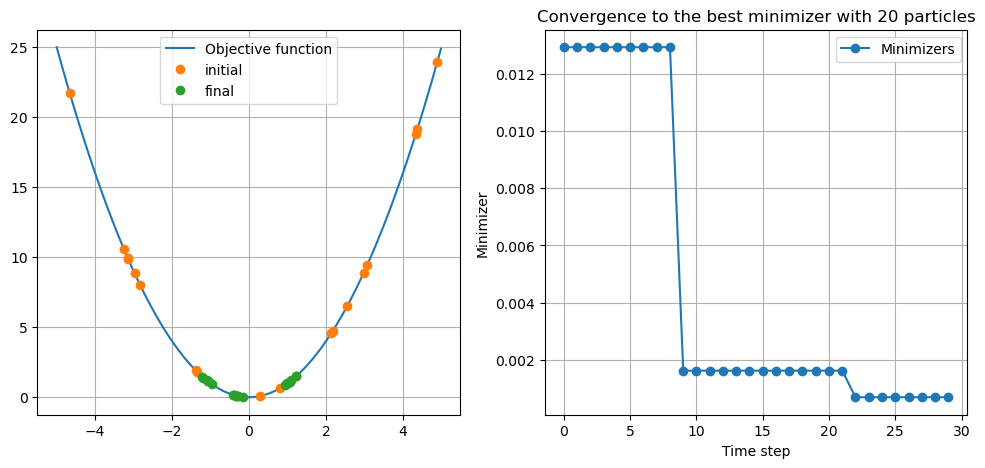

In [147]:
function = square
visualize_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

### 2) **We can try with trickier functions**

- **Alpine function** :  $\forall x \in \mathbb{R},\; f(x) = |x\sin(x)+0.1x|$ and $x_{min} = 0$

In [148]:
def alpine(x):
    return np.abs(x*np.sin(x)+0.1*x)
    

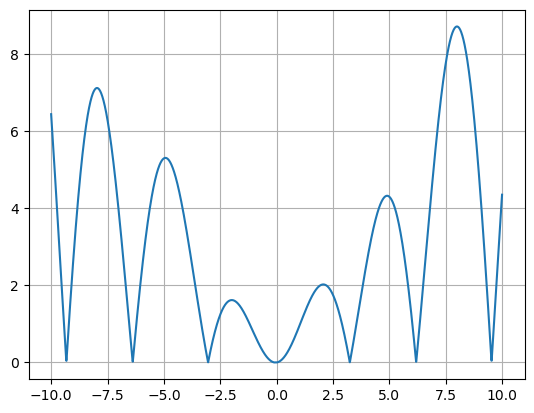

In [149]:
x1 = np.arange(-10, 10, 0.01)
plt.plot(x1, alpine(x1), label = 'Objective function')
plt.grid()
plt.show()

100%|██████████| 30/30 [00:00<00:00, 9581.14it/s]


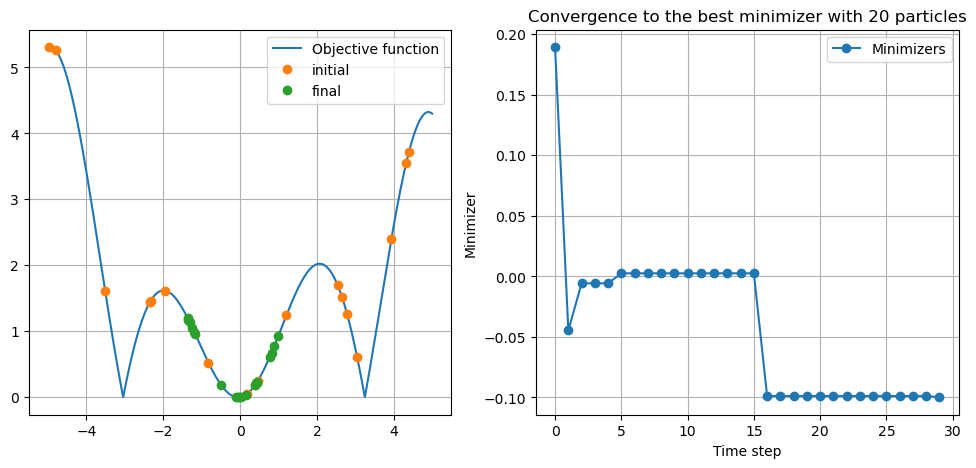

In [151]:
function = alpine
visualize_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

- **Ackley function** : $\forall x \in \mathbb{R},\; f(x) = -20\exp(-0.2\sqrt{x^2})-\exp(\cos(2\pi x))+20+ \mathcal{e}$ and $x_{min} = 0$

In [152]:
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt(x**2)) - np.exp(0.5*np.cos(2*np.pi*x))+ 20 + np.exp(1)

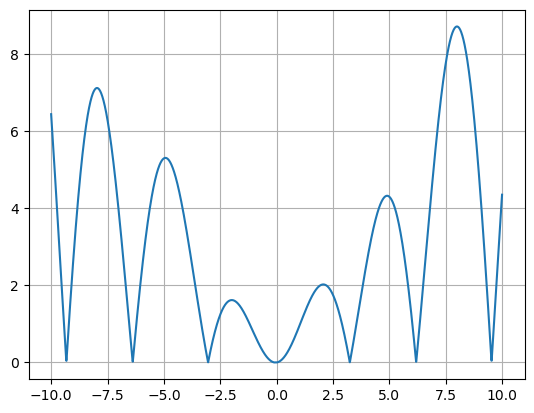

In [153]:
x1 = np.arange(-10, 10, 0.01)
plt.plot(x1, function(x1), label = 'Objective function')
plt.grid()
plt.show()

100%|██████████| 30/30 [00:00<00:00, 6251.76it/s]


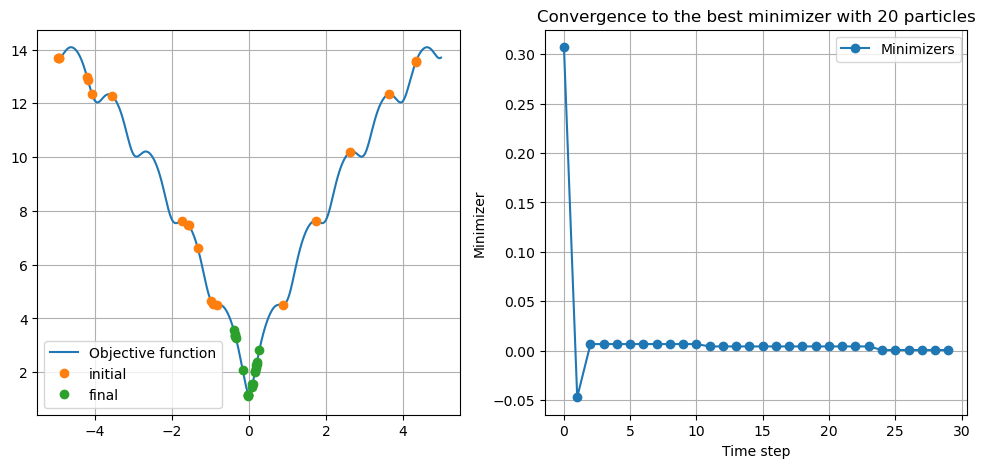

In [154]:
function = ackley
visualize_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

-  **Rastrigin function** : $\forall x \in \mathbb{R},\; f(x) = 10 + (x^2 - 10\cos(2\pi x))$ and $x_{min} = 0$

In [155]:
def rastrigin(x):
    return 10+(x**2-10*np.cos(2*np.pi*x))

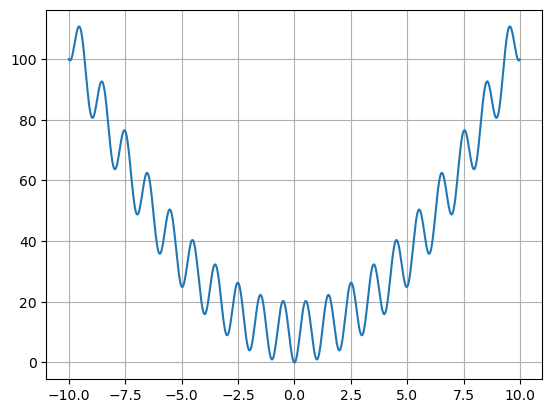

In [156]:
x1 = np.arange(-10, 10, 0.01)
plt.plot(x1, rastrigin(x1), label = 'Objective function')
plt.grid()
plt.show()

100%|██████████| 30/30 [00:00<00:00, 7565.94it/s]


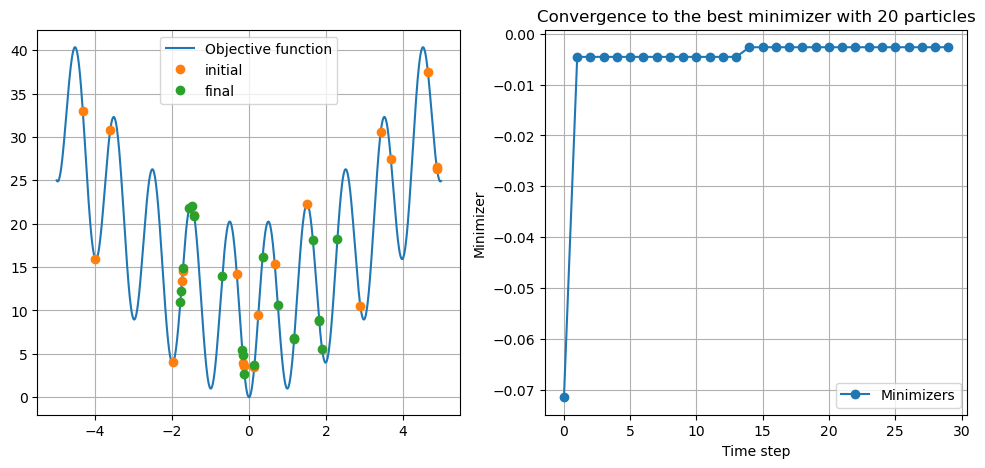

In [169]:
function = rastrigin
visualize_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

- **Xinsheyang2 function** : $\forall x \in \mathbb{R},\; f(x) = |x|\exp(-\sin(x^2))$ and $x_{min} = 0$

In [170]:
def xinsheyang2(x):
    return np.abs(x)*np.exp(-np.sin(x**2))

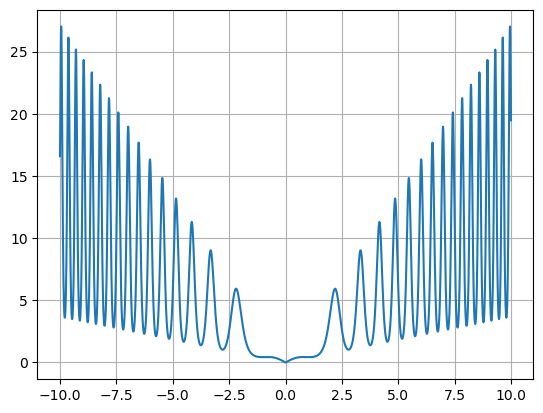

In [171]:
x1 = np.arange(-10, 10, 0.01)
plt.plot(x1, xinsheyang2(x1), label = 'Objective function')
plt.grid()
plt.show()

100%|██████████| 30/30 [00:00<00:00, 7814.50it/s]


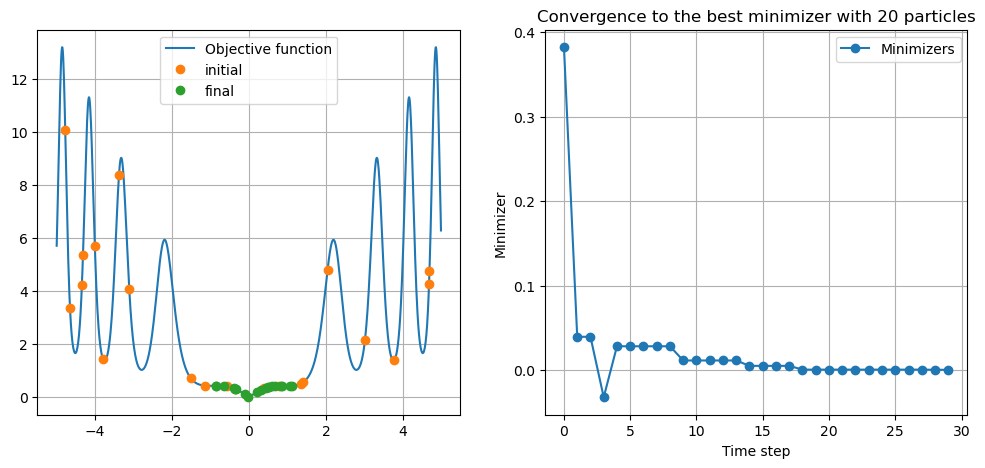

In [172]:
function = xinsheyang2
visualize_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)